In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df=pd.read_csv('pokemon_data.csv')
df.set_index('name')

,dexnum,generation,type1,type2,species,height,weight,ability1,ability2,hidden_ability,...,catch_rate,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group
name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,1,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,NaN,...,45,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
Ivysaur,2,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,NaN,...,45,50,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
Venusaur,3,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,NaN,...,45,50,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
Charmander,4,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,NaN,...,45,50,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
Charmeleon,5,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,NaN,...,45,50,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Raging Bolt,1021,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Ancient Paradox
Iron Boulder,1022,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox
Iron Crown,1023,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,NaN,...,10,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox


In [9]:
df.head()

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,catch_rate,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,45,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,45,50,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,45,50,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,45,50,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,45,50,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary


## Tworzenie database - usunięcie spacji, dodatkowych komentarzy o płci pokemona

In [10]:
df['Liczba liter w nazwie']=df['name'].apply(lambda x: len(x.replace(' ', '').replace('♀(female)', '').replace('♂(male)', '')))
df

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group,Liczba liter w nazwie
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0.7,6.9,Overgrow,Chlorophyll,...,50,64,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,9
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,1.0,13.0,Overgrow,Chlorophyll,...,50,142,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,7
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,2.0,100.0,Overgrow,Chlorophyll,...,50,236,Medium Slow,Grass,Monster,87.5,12.5,20,Ordinary,8
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0.6,8.5,Blaze,Solar Power,...,50,62,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,10
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,1.1,19.0,Blaze,Solar Power,...,50,142,Medium Slow,Dragon,Monster,87.5,12.5,20,Ordinary,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,9,Electric,Dragon,Paradox Pokémon,5.2,480.0,Protosynthesis,NaN,...,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Ancient Paradox,10
1021,1022,Iron Boulder,9,Rock,Psychic,Paradox Pokémon,1.5,162.5,Quark Drive,NaN,...,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox,11
1022,1023,Iron Crown,9,Steel,Psychic,Paradox Pokémon,1.6,156.0,Quark Drive,NaN,...,—,—,Slow,Undiscovered,NaN,NaN,NaN,—,Future Paradox,9
1023,1024,Terapagos,9,Normal,NaN,Tera Pokémon,0.2,6.5,Tera Shift,NaN,...,—,—,Slow,Undiscovered,NaN,50.0,50.0,—,Legendary,9


## Wykres - średnia liczba liter w nazwach Pokemonów

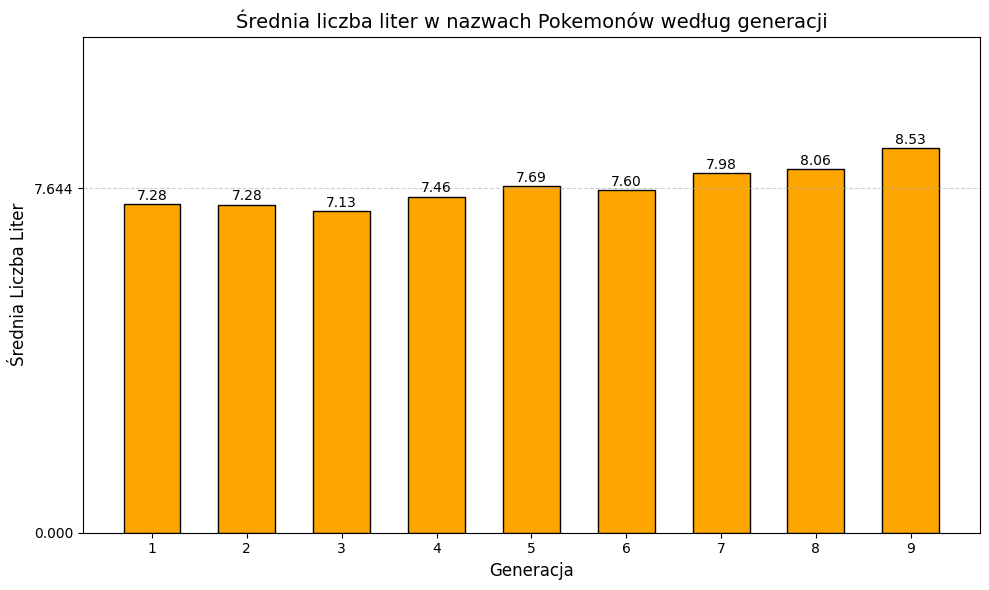

In [7]:
avg_letters = df.groupby('generation')['Liczba liter w nazwie'].mean().reset_index()
avg=df['Liczba liter w nazwie'].mean()

plt.figure(figsize=(10, 6))
plt.bar(avg_letters['generation'].astype(str), avg_letters['Liczba liter w nazwie'], color='orange', edgecolor='black', width=0.6)


plt.title('Średnia liczba liter w nazwach Pokemonów według generacji', fontsize=14)
plt.xlabel('Generacja', fontsize=12)
plt.ylabel('Średnia Liczba Liter', fontsize=12)
plt.xticks(avg_letters['generation'].astype(str))
plt.yticks([0,avg])
plt.ylim(0,11)
plt.grid(axis='y',linestyle='--', alpha=0.6)


for i, row in avg_letters.iterrows():
    plt.text(i, row['Liczba liter w nazwie'] + 0.1, f"{row['Liczba liter w nazwie']:.2f}", ha='center')

plt.tight_layout()

#plt.savefig('srednia_liter_generacja.png')


## Pokemony i ewolucja

In [11]:
evol=pd.read_csv('evolution_stage_map.csv')
evol=evol.set_index('name')
evol

,Evolution_Stage
name,
Bulbasaur,1
Ivysaur,2
Venusaur,3
Charmander,1
Charmeleon,2
...,...
Walking-wake,1
Iron-leaves,1
Poltchageist,1


## NIŻEJ DO ZROBIENIA!!!

In [ ]:
df=pd.merge(evol, 
    main[['dexnum','type1', 'type2']], 
    left_index=True, 
    right_index=True, 
    how='inner'
    )

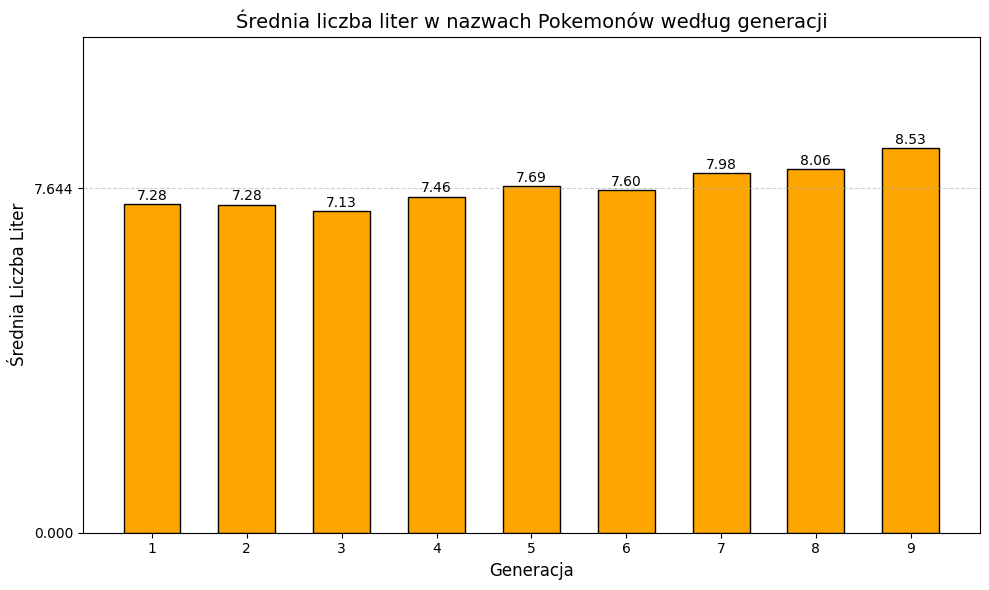

In [13]:
avg_letters = df.groupby('generation')['Liczba liter w nazwie'].mean().reset_index()
avg=df['Liczba liter w nazwie'].mean()

plt.figure(figsize=(10, 6))
plt.bar(avg_letters['generation'].astype(str), avg_letters['Liczba liter w nazwie'], color='orange', edgecolor='black', width=0.6)


plt.title('Średnia liczba liter w nazwach Pokemonów według generacji', fontsize=14)
plt.xlabel('Generacja', fontsize=12)
plt.ylabel('Średnia Liczba Liter', fontsize=12)
plt.xticks(avg_letters['generation'].astype(str))
plt.yticks([0,avg])
plt.ylim(0,11)
plt.grid(axis='y',linestyle='--', alpha=0.6)


for i, row in avg_letters.iterrows():
    plt.text(i, row['Liczba liter w nazwie'] + 0.1, f"{row['Liczba liter w nazwie']:.2f}", ha='center')

plt.tight_layout()

#plt.savefig('srednia_liter_generacja.png')


## Sprawdzanie pokemonów z największą, najmniejszą liczbą liter

In [163]:
df.nlargest(27, 'Liczba liter w nazwie')

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group,Liczba liter w nazwie
739,740,Crabominable,7,Fighting,Ice,Woolly Crab Pokémon,1.7,180.0,Hyper Cutter,Iron Fist,...,50,167,Medium Fast,Water 3,NaN,50.0,50.0,20,Ordinary,12
930,931,Squawkabilly,9,Normal,Flying,Parrot Pokémon,0.6,2.4,Intimidate,Hustle,...,50,146,Erratic,Flying,NaN,50.0,50.0,15,Ordinary,12
946,947,Brambleghast,9,Grass,Ghost,Tumbleweed Pokémon,1.2,6.0,Wind Rider,Infiltrator,...,50,168,Medium Fast,Grass,NaN,50.0,50.0,20,Ordinary,12
1011,1012,Poltchageist,9,Grass,Ghost,Matcha Pokémon,0.1,1.1,Hospitality,Heatproof,...,—,—,Medium Fast,Amorphous,Mineral,NaN,NaN,—,Ordinary,12
661,662,Fletchinder,6,Fire,Flying,Ember Pokémon,0.7,16.0,Flame Body,Gale Wings,...,50,134,Medium Slow,Flying,NaN,50.0,50.0,15,Ordinary,11
805,806,Blacephalon,7,Fire,Ghost,Fireworks Pokémon,1.8,13.0,Beast Boost,NaN,...,0,257,Slow,Undiscovered,NaN,NaN,NaN,120,Ultra Beast,11
821,822,Corvisquire,8,Flying,NaN,Raven Pokémon,0.8,16.0,Keen Eye,Unnerve,...,50,128,Medium Slow,Flying,NaN,50.0,50.0,15,Ordinary,11
822,823,Corviknight,8,Flying,Steel,Raven Pokémon,2.2,75.0,Pressure,Unnerve,...,50,248,Medium Slow,Flying,NaN,50.0,50.0,15,Ordinary,11
846,847,Barraskewda,8,Water,NaN,Skewer Pokémon,1.3,30.0,Swift Swim,Propeller Tail,...,50,172,Slow,Water 2,NaN,50.0,50.0,20,Ordinary,11
850,851,Centiskorch,8,Fire,Bug,Radiator Pokémon,3.0,120.0,Flash Fire,White Smoke,...,50,184,Medium Fast,Bug,NaN,50.0,50.0,20,Ordinary,11


In [164]:
df.nsmallest(13, 'Liczba liter w nazwie')

,dexnum,name,generation,type1,type2,species,height,weight,ability1,ability2,...,base_friendship,base_exp,growth_rate,egg_group1,egg_group2,percent_male,percent_female,egg_cycles,special_group,Liczba liter w nazwie
88,89,Muk,1,Poison,NaN,Sludge Pokémon,1.2,30.0,Stench,Sticky Hold,...,50,175,Medium Fast,Amorphous,NaN,50.0,50.0,20,Ordinary,3
150,151,Mew,1,Psychic,NaN,New Species Pokémon,0.4,4.0,Synchronize,NaN,...,100,300,Medium Slow,Undiscovered,NaN,NaN,NaN,120,Mythical,3
62,63,Abra,1,Psychic,NaN,Psi Pokémon,0.9,19.5,Synchronize,Inner Focus,...,50,62,Medium Slow,Human-Like,NaN,75.0,25.0,20,Ordinary,4
85,86,Seel,1,Water,NaN,Sea Lion Pokémon,1.1,90.0,Thick Fat,Hydration,...,50,65,Medium Fast,Field,Water 1,50.0,50.0,20,Ordinary,4
94,95,Onix,1,Rock,Ground,Rock Snake Pokémon,8.8,210.0,Rock Head,Sturdy,...,50,77,Medium Fast,Mineral,NaN,50.0,50.0,25,Ordinary,4
123,124,Jynx,1,Ice,Psychic,Human Shape Pokémon,1.4,40.6,Oblivious,Forewarn,...,50,159,Medium Fast,Human-Like,NaN,0.0,100.0,25,Ordinary,4
176,177,Natu,2,Psychic,Flying,Tiny Bird Pokémon,0.2,2.0,Synchronize,Early Bird,...,50,64,Medium Fast,Flying,NaN,50.0,50.0,20,Ordinary,4
177,178,Xatu,2,Psychic,Flying,Mystic Pokémon,1.5,15.0,Synchronize,Early Bird,...,50,165,Medium Fast,Flying,NaN,50.0,50.0,20,Ordinary,4
303,304,Aron,3,Steel,Rock,Iron Armor Pokémon,0.4,60.0,Sturdy,Rock Head,...,35,66,Slow,Monster,NaN,50.0,50.0,35,Ordinary,4
479,480,Uxie,4,Psychic,NaN,Knowledge Pokémon,0.3,0.3,Levitate,NaN,...,140,290,Slow,Undiscovered,NaN,NaN,NaN,80,Legendary,4


## Rozkład z rozkładem Gaussa

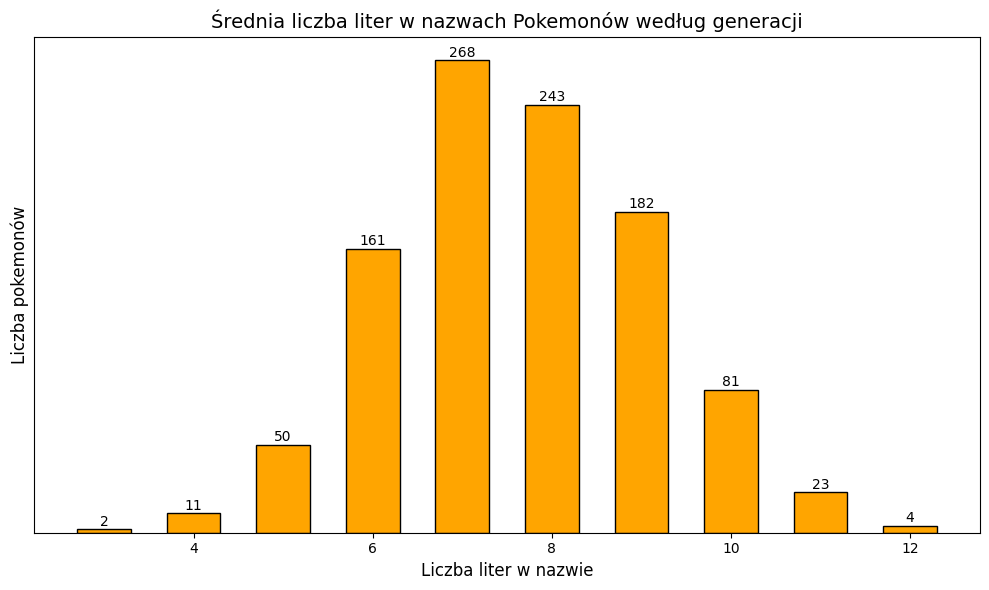

In [167]:
poke_number=df['Liczba liter w nazwie'].value_counts().sort_index().to_frame().reset_index()


plt.figure(figsize=(10, 6))

plt.bar(poke_number['Liczba liter w nazwie'], poke_number['count'], color='orange', edgecolor='black', width=0.6)

for i, row in poke_number.iterrows():
    plt.text(i+3, row['count'] + 2, row['count'], ha='center')

plt.title('Średnia liczba liter w nazwach Pokemonów według generacji', fontsize=14)
plt.xlabel('Liczba liter w nazwie', fontsize=12)
plt.ylabel('Liczba pokemonów', fontsize=12)
plt.yticks([])


plt.tight_layout()


## Ewentualny rozkład Gaussa

<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\m'
<>:36: SyntaxWarning: invalid escape sequence '\s'
/var/folders/ks/l5k0stm95w5b5kn73hwp_8hc0000gn/T/ipykernel_54195/1280184221.py:36: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, pdf_scaled, color='red', linestyle='-', linewidth=2, label=f'Rozkład Gaussa ($\mu={mu:.2f}, \sigma={sigma:.2f}$)')
/var/folders/ks/l5k0stm95w5b5kn73hwp_8hc0000gn/T/ipykernel_54195/1280184221.py:36: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, pdf_scaled, color='red', linestyle='-', linewidth=2, label=f'Rozkład Gaussa ($\mu={mu:.2f}, \sigma={sigma:.2f}$)')


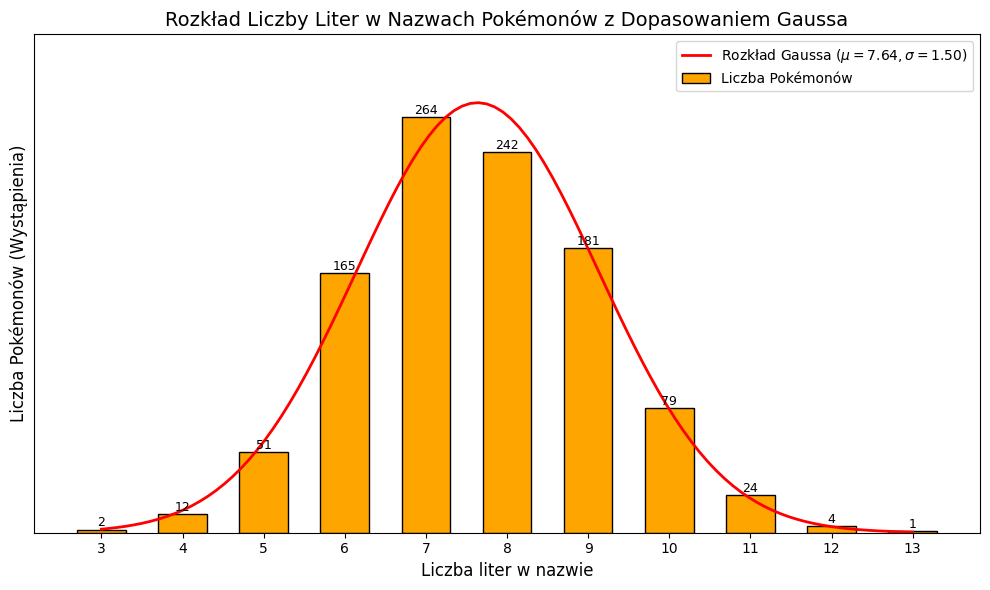

In [191]:
from scipy.stats import norm

# --- 1. Rekonstrukcja danych 'poke_number' ---
# Wczytanie danych
df = pd.read_csv('pokemon_data.csv')

# Obliczenie liczby liter w nazwie
df['Liczba liter w nazwie'] = df['name'].str.replace('[^a-zA-Z]', '', regex=True).str.len()

# Tworzenie DataFrame 'poke_number'
poke_number = df['Liczba liter w nazwie'].value_counts().sort_index().to_frame().reset_index()
poke_number.columns = ['Liczba liter w nazwie', 'count']

# --- 2. Parametry Krzywej Gaussa (podane przez Ciebie) ---
mu = df['Liczba liter w nazwie'].mean()
sigma = df['Liczba liter w nazwie'].std()

# --- 3. Generowanie krzywej Gaussa (PDF) ---
x_min = poke_number['Liczba liter w nazwie'].min()
x_max = poke_number['Liczba liter w nazwie'].max()
x = np.linspace(x_min, x_max, 100) # Gęste punkty dla gładkiej krzywej

pdf = norm.pdf(x, mu, sigma)

# Skalowanie PDF do wysokości histogramu (liczby wystąpień)
N = len(df)
pdf_scaled = pdf * N * 1 # Bin width = 1

# --- 4. Tworzenie Wykresu ---
plt.figure(figsize=(10, 6))

# Wykres Słupkowy
plt.bar(poke_number['Liczba liter w nazwie'], poke_number['count'], color='orange', edgecolor='black', width=0.6, label='Liczba Pokémonów')

# Nakładanie krzywej Gaussa
plt.plot(x, pdf_scaled, color='red', linestyle='-', linewidth=2, label=f'Rozkład Gaussa ($\mu={mu:.2f}, \sigma={sigma:.2f}$)')


# Dodanie etykiet (wartości nad słupkami)
for index, row in poke_number.iterrows():
    plt.text(row['Liczba liter w nazwie'], row['count'] + 2, int(row['count']), ha='center', fontsize=9)

# Ustawienia wykresu
plt.title('Rozkład Liczby Liter w Nazwach Pokémonów z Dopasowaniem Gaussa', fontsize=14)
plt.xlabel('Liczba liter w nazwie', fontsize=12)
plt.ylabel('Liczba Pokémonów (Wystąpienia)', fontsize=12)
plt.yticks([])
plt.legend()
plt.xticks(np.arange(x_min, x_max + 1, step=1)) 
plt.ylim(0, poke_number['count'].max() * 1.2) 

plt.tight_layout()
